# <b>CS156 (Introduction to AI), Fall 2021</b>
# <u><b>Homework 3 submission</b></u>

### Roster Name: David Danialy
### Student ID: 011187150
### Email address: david.danialy@sjsu.edu

##  <u>References and sources </u>

All code from Regression.Boston.ipynb


##  <u>Solution</u>

#### Load libraries and set random number generator seed

In [1]:
import numpy as np
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
np.random.seed(24)

#### Code the solution

In [3]:
dataset = pd.read_csv('Linear Regression Data.csv')
print(str(dataset))

      cement   slag  flyash  water  superplasticizer  coarseaggregate  \
0      540.0    0.0     0.0  162.0               2.5           1040.0   
1      540.0    0.0     0.0  162.0               2.5           1055.0   
2      332.5  142.5     0.0  228.0               0.0            932.0   
3      332.5  142.5     0.0  228.0               0.0            932.0   
4      198.6  132.4     0.0  192.0               0.0            978.4   
...      ...    ...     ...    ...               ...              ...   
1025   276.4  116.0    90.3  179.6               8.9            870.1   
1026   322.2    0.0   115.6  196.0              10.4            817.9   
1027   148.5  139.4   108.6  192.7               6.1            892.4   
1028   159.1  186.7     0.0  175.6              11.3            989.6   
1029   260.9  100.5    78.3  200.6               8.6            864.5   

      fineaggregate  age  csMPa  
0             676.0   28  79.99  
1             676.0   28  61.89  
2             594.0  

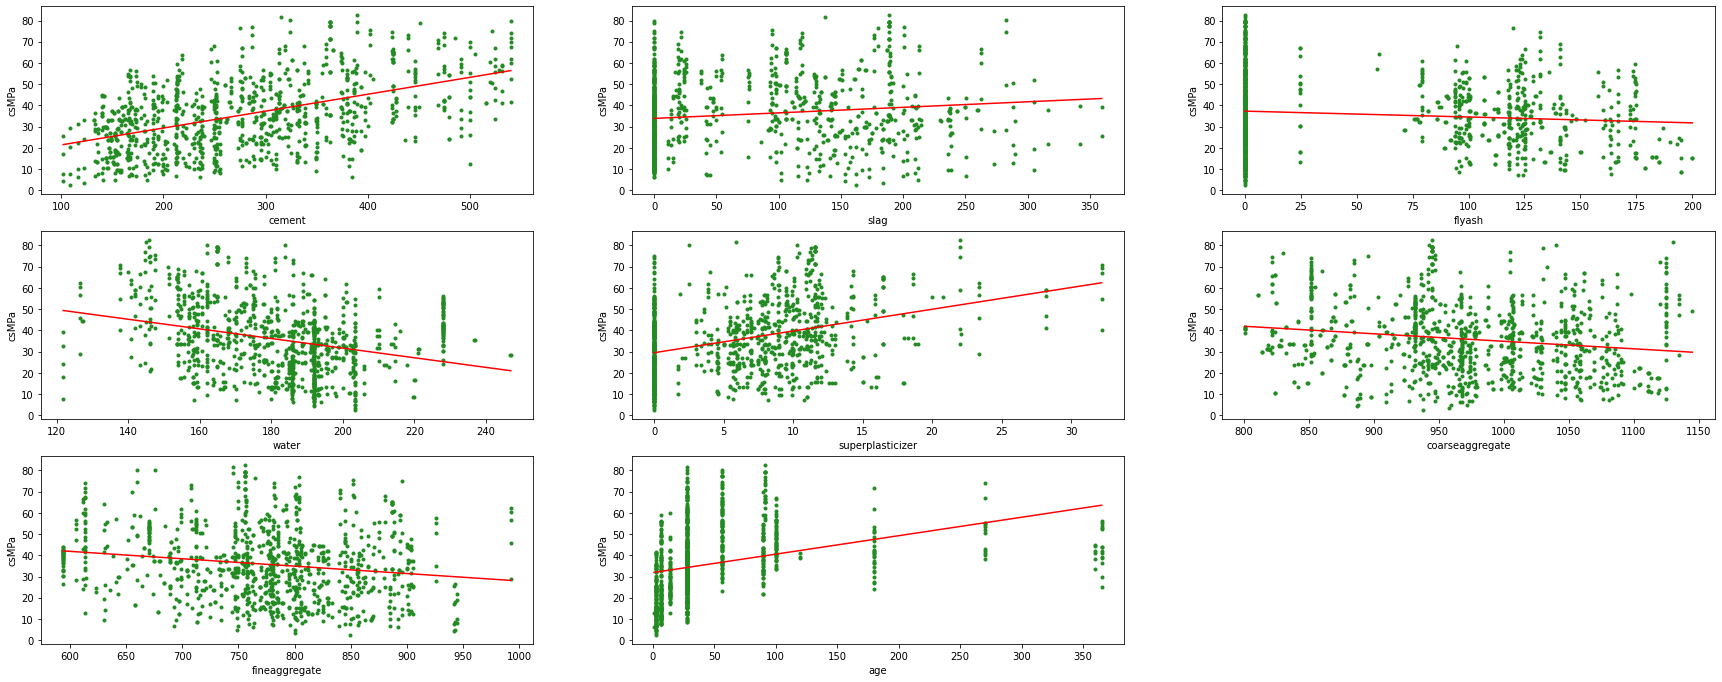

In [4]:
#Code from example given in files
plt.figure(figsize=(30,20))
for i, col in enumerate(dataset.columns[0:8]):
    plt.subplot(5, 3, i+1)
    x = dataset[col]
    y = dataset['csMPa']
    plt.plot(x, y, '.', color="forestgreen")
    # create linear regression line:
    plt.plot(np.unique(x), np.poly1d(np.polyfit(x, y, 1))(np.unique(x)),color="red")
    plt.xlabel(col)
    plt.ylabel('csMPa')

<AxesSubplot:>

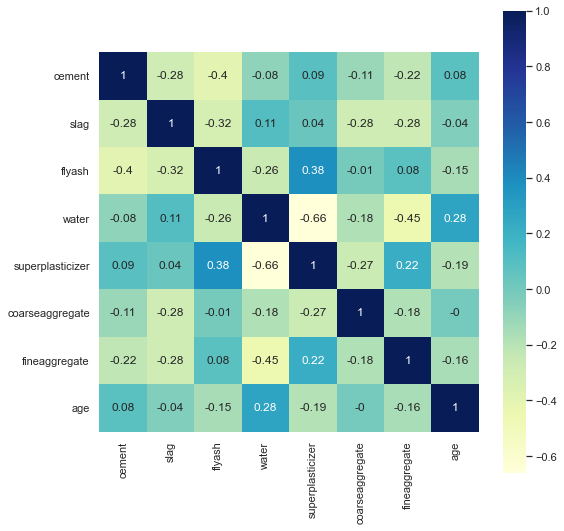

In [5]:
features = dataset[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']]
sns.set(rc={'figure.figsize': (8.5,8.5)})
sns.heatmap(features.corr().round(2), square=True, cmap='YlGnBu', annot=True)

In [6]:
X_train, X_test, Y_train, Y_test = train_test_split(dataset[['cement','slag','flyash','water','superplasticizer','coarseaggregate','fineaggregate','age']], dataset['csMPa'], test_size=0.2, random_state=0)
model = linear_model.LinearRegression().fit(X_train, Y_train)

Y_test_pred = model.predict(X_test)

# The mean squared error:
print('Mean squared error: %.2f' % mean_squared_error(Y_test, Y_test_pred))

# The coefficient of determination (1 is perfect prediction):
print('Coefficient of determination: %.2f' % r2_score(Y_test, Y_test_pred))

Mean squared error: 95.62
Coefficient of determination: 0.64
